# Resolvendo o problema das portas lógicas AND (E) e OR (OU) usando uma SLP (Single Layer Perceptron)

### Primeiro importamos a base de dados desejada problemAND.csv ou problemOR.csv

In [70]:
import pandas as pd

problem = 'problemAND'
problem = 'problemOR'

df = pd.read_csv(problem + '.csv')

df.head()

,x1,x2,y
0,-1,-1,-1
1,-1,1,1
2,1,-1,1
3,1,1,1


### Depois, plotamos a distribuição dos dados
com azul = -1, e vermelho = 1

In [71]:
import matplotlib.pyplot as plt

def show_dataset(data, ax):
    data[data.y==-1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(problem)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)

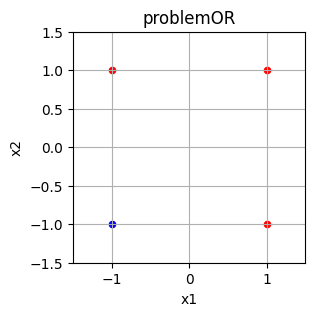

In [72]:
fig = plt.figure(figsize=(3,3))
show_dataset(df, fig.gca())

### Instanciamos um Neurônio para compor a nossa SLP
com qualquer peso e viés.

In [73]:
import random
from SLP import Neuron

a = -1
b = 1

initial_weights = [random.randint(a, b), random.randint(a, b)]
intial_bias = random.randint(a, b)
learning_rate = 0.5

SLP = Neuron(initial_weights, intial_bias, learning_rate)

### definição do método para rodar o dataset inteiro para treinar a SLP

In [74]:
def train_SLP(SLP, data):
    total_error = 0 
    for _, line in data.iterrows():
        inputs = line[0:2]
        target = line[2]
        total_error = total_error + SLP.learn(inputs, target)
    return total_error

### definição da quantidade de épocas e execução do treinamento e um teste (com um dado extraído do dataset original)

In [75]:
import numpy as np

epochs = 6
pre_error = -1
error = -1

for _ in range(epochs):
    error = train_SLP(SLP, df)
    if (np.abs(pre_error-error) < 0.1):
        break
    pre_error = error


test_sample = df.sample()[["x1","x2"]].to_numpy()[0]
print()
print(test_sample)
print(SLP.process(test_sample))


[-1 -1]
-1


In [76]:
def limit(SLP, inputs):
    weights_0 = SLP.weights[0]
    weights_1 = SLP.weights[1]
    bias = SLP.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold


def show_threshold(SLP, ax):
    xlim = plt.gca().get_xlim()
    
    x2 = [limit(SLP, x1) for x1 in xlim]
    
    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)

def show_dataset_threshold(SLP, data, ax):
    data[data.y==-1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(problem)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    show_threshold(SLP, ax)

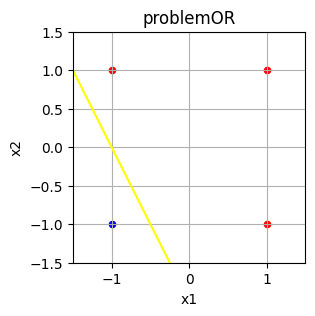

In [77]:
fig = plt.figure(figsize=(3,3))
show_dataset_threshold(SLP, df, fig.gca())